In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
ROOT = "data"
CLASS_NAME = sorted(list(os.listdir(f"{ROOT}/train")))

In [5]:
def read_image_from_path(path, size):
    """
    Read image from path and return as numpy array

    Args:
        path (str): path to image
        size (tuple): size of image to resize

    Returns:
        numpy image

    """
    im = Image.open(path).convert("RGB").resize(size)
    return np.array(im)


def folder_to_images(folder, size):
    """
    Read all images in folder and return as numpy array

    Args:
        folder (str): path to folder
        size (tuple): size of image to resize

    Returns:
        numpy image, numpy path
    """

    list_dir = [folder + "/" + name for name in os.listdir(folder)]
    images_np = np.zeros(shape=(len(list_dir), *size, 3))
    images_path = []
    for i, path in enumerate(list_dir):
        images_np[i] = read_image_from_path(path, size)
        images_path.append(path)
    images_path = np.array(images_path)
    return images_np, images_path

# 2.1.1 Truy vấn hình ảnh với độ đo L1

In [6]:
def absolute_difference(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    return np.sum(np.abs(data - query), axis=axis_batch_size)

In [7]:
def get_l1_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(
                path, size
            )  # mang numpy nhieu anh, paths
            rates = absolute_difference(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

In [23]:
def plot_results(querquery_pathy, ls_path_score, reverse):
    fig = plt.figure(figsize=(12, 9))
    fig.add_subplot(2, 3, 1)
    plt.imshow(read_image_from_path(querquery_pathy, size=(448, 448)))
    plt.title(f"Query Image: {querquery_pathy.split('/')[2]}", fontsize=16)
    plt.axis("off")
    for i, path in enumerate(
        sorted(ls_path_score, key=lambda x: x[1], reverse=reverse)[:5], 2
    ):
        fig.add_subplot(2, 3, i)
        plt.imshow(read_image_from_path(path[0], size=(448, 448)))
        plt.title(f"Top {i-1}: {path[0].split('/')[2]}", fontsize=16)
        plt.axis("off")
    plt.show()

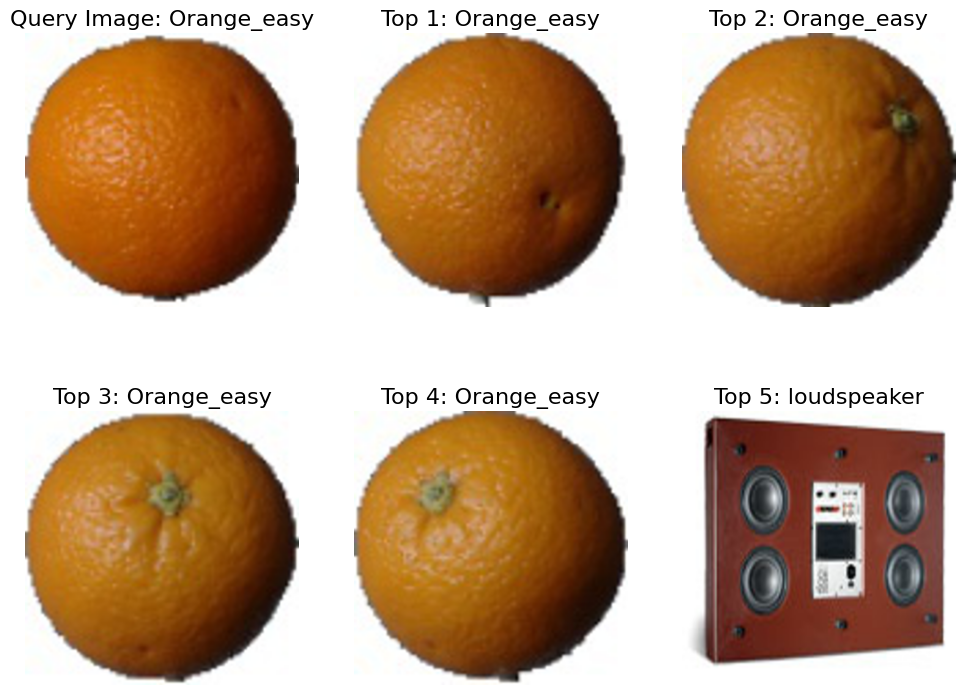

In [24]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

In [25]:
ls_path_score[:10]

[('data/train/African_crocodile/n01697457_10393.JPEG', 61358633.0),
 ('data/train/African_crocodile/n01697457_104.JPEG', 48248024.0),
 ('data/train/African_crocodile/n01697457_1331.JPEG', 52395683.0),
 ('data/train/African_crocodile/n01697457_14906.JPEG', 53721578.0),
 ('data/train/African_crocodile/n01697457_18587.JPEG', 49970490.0),
 ('data/train/African_crocodile/n01697457_260.JPEG', 46559823.0),
 ('data/train/African_crocodile/n01697457_5586.JPEG', 53989546.0),
 ('data/train/African_crocodile/n01697457_8136.JPEG', 51450166.0),
 ('data/train/African_crocodile/n01697457_8331.JPEG', 59068854.0),
 ('data/train/African_crocodile/n01697457_85.JPEG', 53013754.0)]

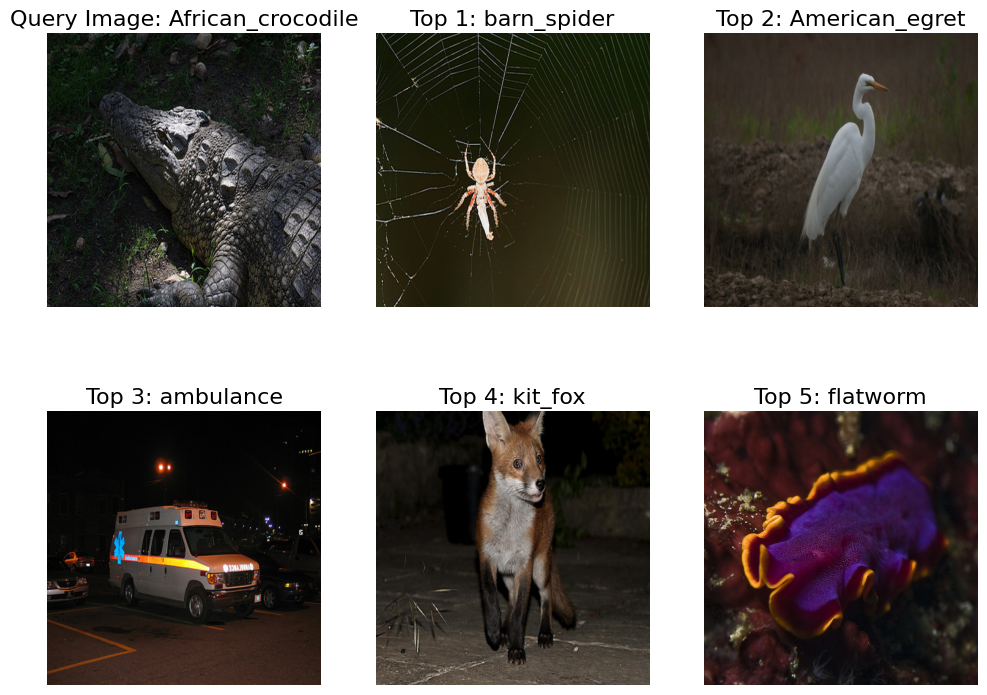

In [26]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_l1_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

# 2.1.2 Truy vấn hình ảnh với độ đo L2

In [27]:
def mean_square_difference(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    return np.mean((data - query) ** 2, axis=axis_batch_size)

In [28]:
def get_l2_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(
                path, size
            )  # mang numpy nhieu anh, paths
            rates = mean_square_difference(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

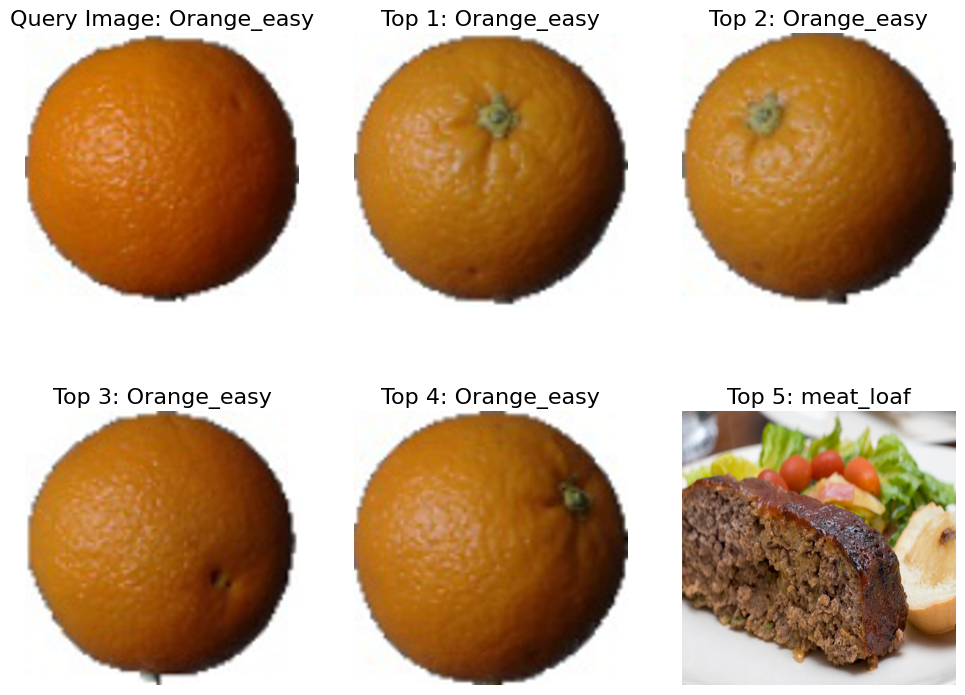

In [29]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_l2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

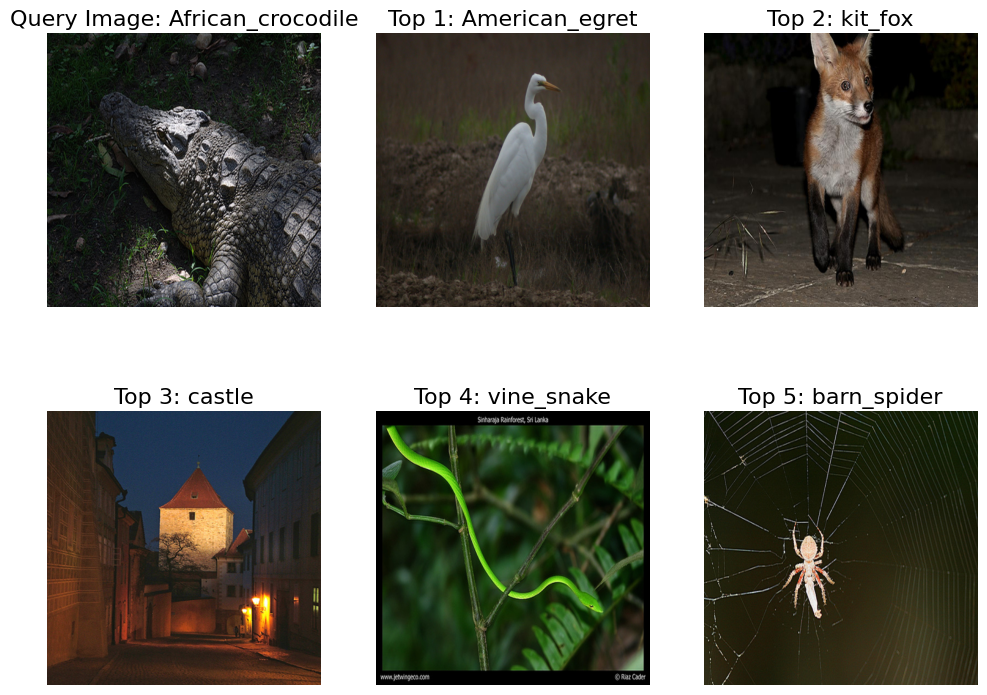

In [30]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_l2_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=False)

In [31]:
ls_path_score[:10]

[('data/train/African_crocodile/n01697457_10393.JPEG', 15844.684633423682),
 ('data/train/African_crocodile/n01697457_104.JPEG', 6731.91368881537),
 ('data/train/African_crocodile/n01697457_1331.JPEG', 8350.014575361394),
 ('data/train/African_crocodile/n01697457_14906.JPEG', 3821.784463687819),
 ('data/train/African_crocodile/n01697457_18587.JPEG', 6725.408344294749),
 ('data/train/African_crocodile/n01697457_260.JPEG', 12422.653011399872),
 ('data/train/African_crocodile/n01697457_5586.JPEG', 4831.298590627657),
 ('data/train/African_crocodile/n01697457_8136.JPEG', 5668.633219401042),
 ('data/train/African_crocodile/n01697457_8331.JPEG', 10545.258926910608),
 ('data/train/African_crocodile/n01697457_85.JPEG', 5222.664469401042)]

# 2.1.3 Truy vấn hình ảnh với độ đo Cosine Similarity

In [32]:
def cosine_similarity(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    # Ứng dụng norm
    query_norm = np.sqrt(np.sum(query**2))
    data_norm = np.sqrt(np.sum(data**2, axis=axis_batch_size))
    return np.sum(data * query, axis=axis_batch_size) / (
        query_norm * data_norm + np.finfo(float).eps
    )

In [33]:
def get_cosine_similarity_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(
                path, size
            )  # mang numpy nhieu anh, paths
            rates = cosine_similarity(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

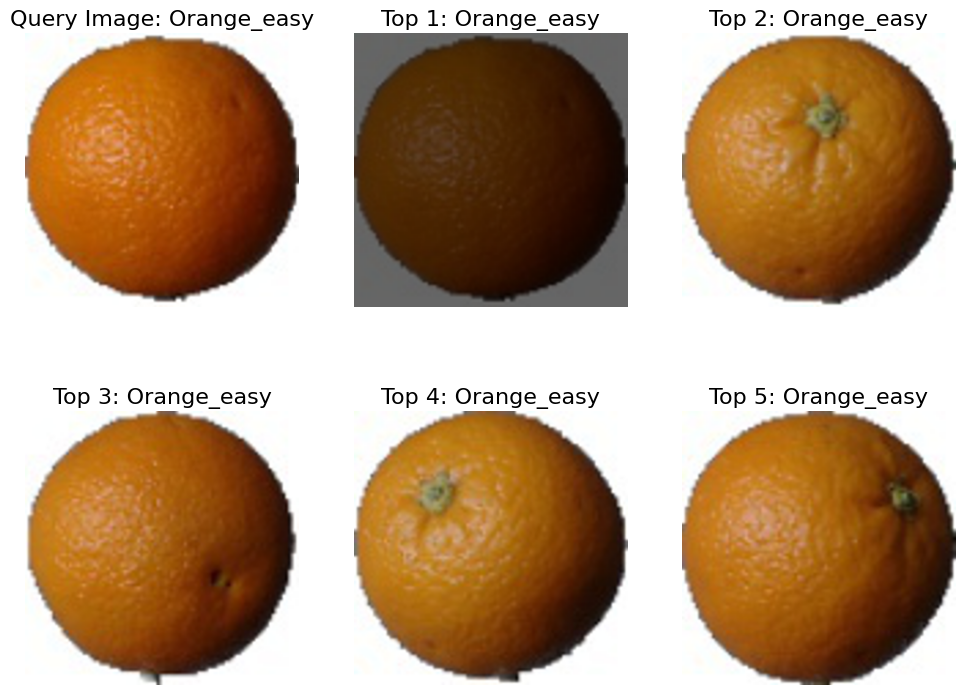

In [34]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

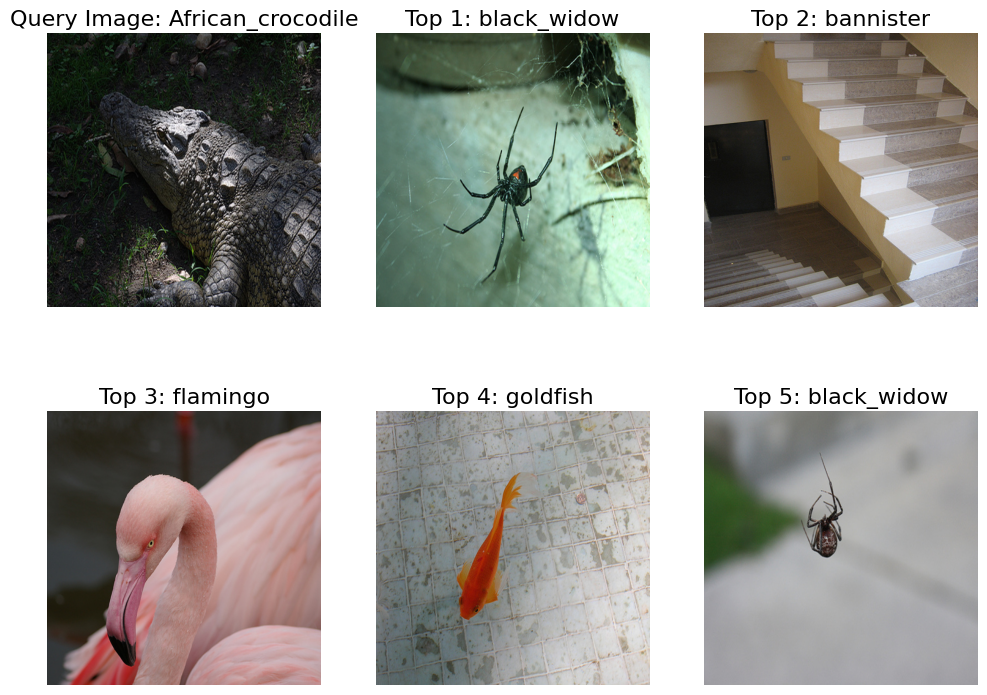

In [35]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_cosine_similarity_score(root_img_path, query_path, size)
plot_results(query_path, ls_path_score, reverse=True)

In [36]:
ls_path_score[:10]

[('data/train/African_crocodile/n01697457_10393.JPEG', 3.847231688156522),
 ('data/train/African_crocodile/n01697457_104.JPEG', 3.5601348718610306),
 ('data/train/African_crocodile/n01697457_1331.JPEG', 3.9860097451861387),
 ('data/train/African_crocodile/n01697457_14906.JPEG', 3.808687261995355),
 ('data/train/African_crocodile/n01697457_18587.JPEG', 3.4365677236258527),
 ('data/train/African_crocodile/n01697457_260.JPEG', 3.593177620528298),
 ('data/train/African_crocodile/n01697457_5586.JPEG', 3.3678955683756477),
 ('data/train/African_crocodile/n01697457_8136.JPEG', 3.240405828198146),
 ('data/train/African_crocodile/n01697457_8331.JPEG', 3.8811305302060064),
 ('data/train/African_crocodile/n01697457_85.JPEG', 3.7317527651834324)]

# 2.1.4 Truy vấn hình ảnh với độ đo Correlation Coefficient

In [37]:
def correlation_coefficient(query, data):
    axis_batch_size = tuple(range(1, len(data.shape)))
    query_mean = query - np.mean(query)
    data_mean = data - np.mean(data, axis=axis_batch_size, keepdims=True)
    query_norm = np.sqrt(np.sum(query_mean**2))
    data_norm = np.sqrt(np.sum(data_mean**2, axis=axis_batch_size))

    return np.sum(data_mean * query_mean, axis=axis_batch_size) / (
        query_norm * data_norm + np.finfo(float).eps
    )

In [38]:
def get_correlation_coefficient_score(root_img_path, query_path, size):
    query = read_image_from_path(query_path, size)
    ls_path_score = []
    for folder in os.listdir(root_img_path):
        if folder in CLASS_NAME:
            path = root_img_path + folder
            images_np, images_path = folder_to_images(
                path, size
            )  # mang numpy nhieu anh, paths
            rates = correlation_coefficient(query, images_np)
            ls_path_score.extend(list(zip(images_path, rates)))
    return query, ls_path_score

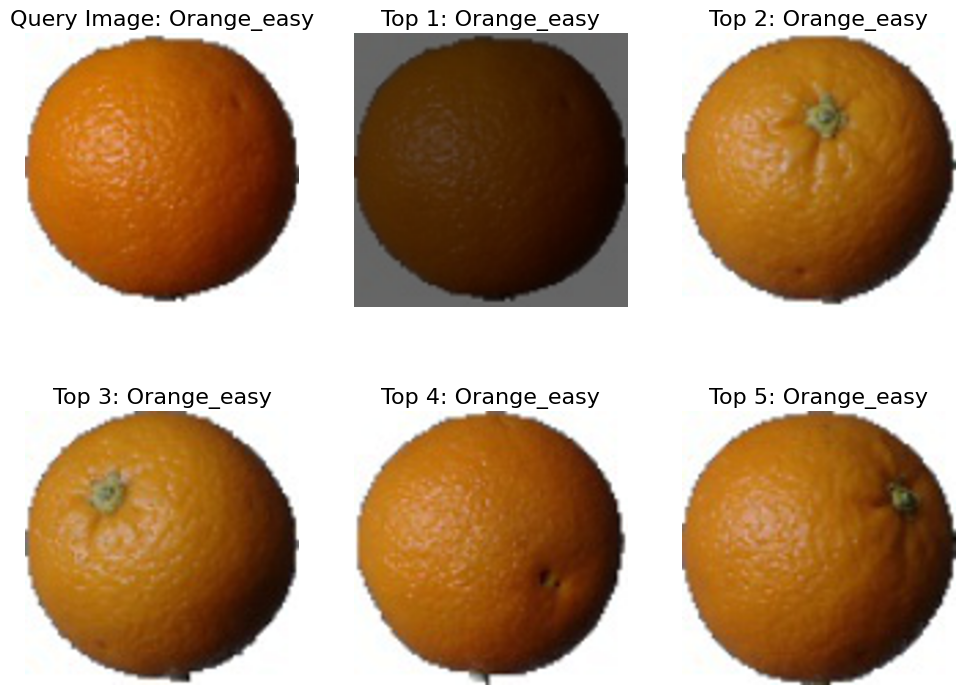

In [39]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/Orange_easy/0_100.jpg"
size = (448, 448)
query, ls_path_score = get_correlation_coefficient_score(
    root_img_path, query_path, size
)
plot_results(query_path, ls_path_score, reverse=True)

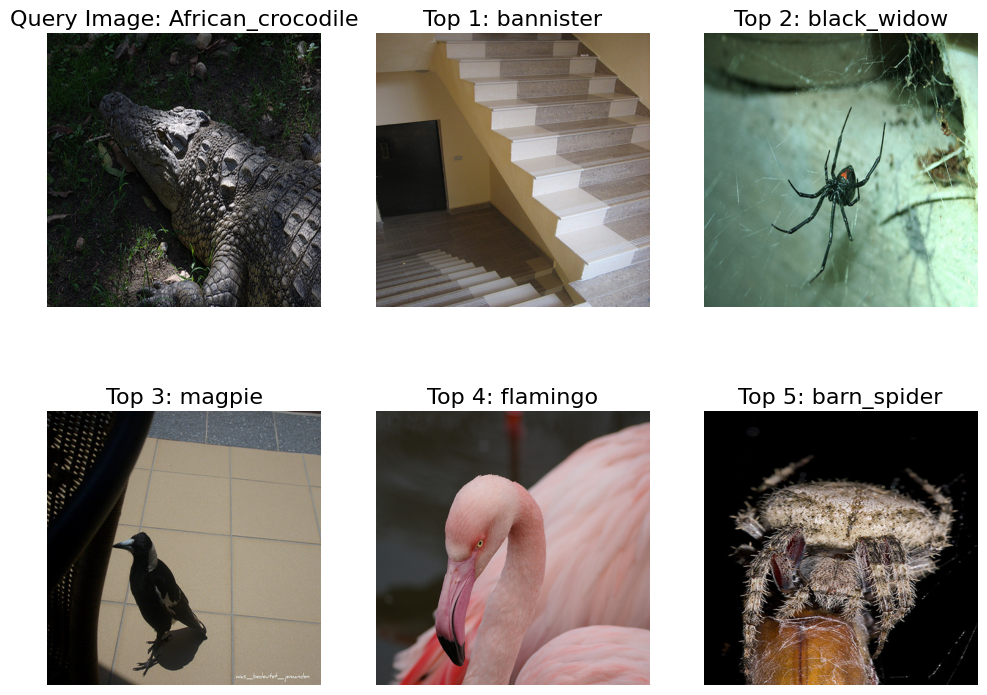

In [40]:
root_img_path = f"{ROOT}/train/"
query_path = f"{ROOT}/test/African_crocodile/n01697457_18534.JPEG"
size = (448, 448)
query, ls_path_score = get_correlation_coefficient_score(
    root_img_path, query_path, size
)
plot_results(query_path, ls_path_score, reverse=True)